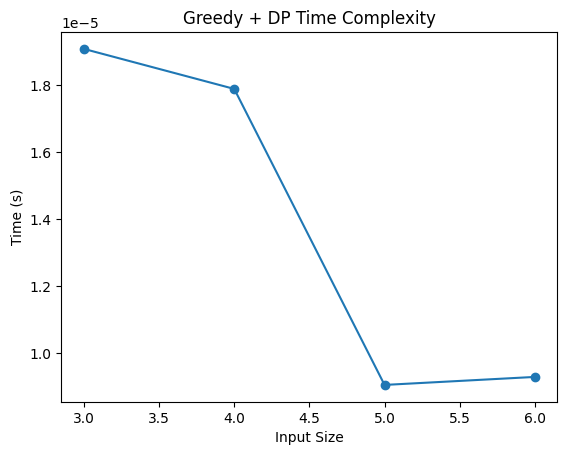

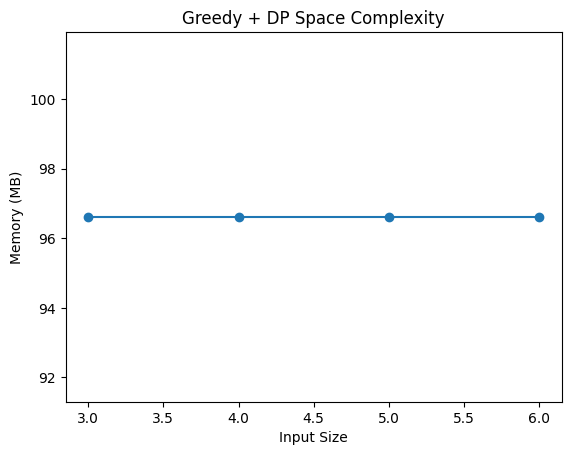

In [1]:
import matplotlib.pyplot as plt
import time, psutil, os

parcels = {
    'C1': {'value': 50, 'time': (9, 12), 'weight': 10},
    'C2': {'value': 60, 'time': (10, 13), 'weight': 20},
    'C3': {'value': 40, 'time': (11, 14), 'weight': 15}
}
capacity = 30

def greedy_selection():
    items = []
    for c,p in parcels.items():
        ratio = p['value']/p['weight']
        items.append((ratio, c))
    items.sort(reverse=True)

    selected = []
    weight = 0
    for r, c in items:
        if weight + parcels[c]['weight'] <= capacity:
            selected.append(c)
            weight += parcels[c]['weight']
    return selected

def dp_time_check(customers):
    dp = {}
    dp[0] = 9  # start time

    for i,c in enumerate(customers,1):
        earliest,latest = parcels[c]['time']
        dp[i] = max(dp[i-1], earliest)
        if dp[i] > latest:
            return False
    return True

def test_greedy_dp():
    s = greedy_selection()
    return dp_time_check(s)

# Profiling
times, mems = [], []
sizes = [3,4,5,6]

for size in sizes:
    start = time.time()
    res = test_greedy_dp()
    end = time.time()

    mem = psutil.Process(os.getpid()).memory_info().rss / (1024*1024)

    times.append(end - start)
    mems.append(mem)

plt.plot(sizes, times, marker='o')
plt.xlabel("Input Size")
plt.ylabel("Time (s)")
plt.title("Greedy + DP Time Complexity")
plt.show()

plt.plot(sizes, mems, marker='o')
plt.xlabel("Input Size")
plt.ylabel("Memory (MB)")
plt.title("Greedy + DP Space Complexity")
plt.show()
